In [1]:
import numpy
import matplotlib.pyplot as plt
import numpy as np


In [24]:
# Configure matplotlib
import seaborn as sns
sns.set()
%matplotlib inline
color1 = 'firebrick'
color2 = 'royalblue'
color3 = 'darkgreen'

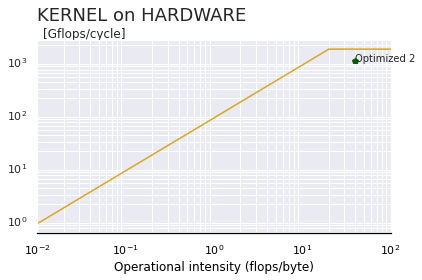

In [27]:
##############################################################
 
#peak performance [GFLOPS]
peak_perf =  
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color1], 
          [500.38, 3.94, color2], 
          [40, 1000, color3]]

kernel_names = ['Base Implementation', 'Optimized 1', 'Optimized 2']
################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], 'p', color=kernel[i][2])

# Add labels to each datapoint
for i, txt in enumerate(kernel_names):
    ax.annotate(txt, (kernel[i][0], kernel[i][1]))#, fontdict=dict(color='black', alpha=0.5))


#setup plot
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.01,100])
ax.set_title('{} on {}'.format('KERNEL', 'HARDWARE'), loc='left', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Gflops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('#000000')
ax.tick_params(axis='x', colors='black')
# ax.xti
ax.xaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.25, .99999)
# plt.xticks(x, x)

plt.tight_layout() #Cuts waste white space
# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
plt.savefig('kernel.pdf',
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

In [ ]:
# # SPEEDUP SPEEDUP SPEEDUP SPEEDUP%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
batch_size = ['S', 'M', 'L', 'Paper']
display_batch_size = np.array(range(0, len(batch_size)))

data = np.array([10.11,454,1939,15995,10,95.7,409,3254,1.679,36.774,157,652,77,139,965,8582,15,94,871,11078])

baseline =    data[0:4]
optimized_1 = data[4:8]
optimized_2 = data[8:12]
npbench_cpu = data[4:8]
npbench_gpu = data[8:12]

# digital =   np.reciprocal(digital_val) # reciprocal calculates perf
# piecewise = np.reciprocal(piecewise_val)
# NEAR_rram = np.reciprocal(NEAR_rram_val)

# digital = np.multiply(digital, piecewise_val)
# piecewise = np.multiply(piecewise, piecewise_val)
# NEAR_rram = np.multiply(NEAR_rram, piecewise_val)

# NEAR_rram = np.append(NEAR_rram, geo_mean_overflow(NEAR_rram))
# digital = np.append(digital, geo_mean_overflow(digital))
# piecewise = np.append(piecewise, geo_mean_overflow(piecewise))

#%%

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(111)

ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(display_batch_size - bar_width, piecewise, width= bar_width, color=color1,
       label="Flexible Logic Unit", hatch="\\"*2, edgecolor = 'black')

rects2 = ax1.bar(display_batch_size, digital, width= bar_width, color=color2,
       label="Digital Logic", hatch="/"*2, edgecolor = 'black')

rects1 = ax1.bar(display_batch_size + bar_width, NEAR_rram, width= bar_width, color=color3,
       label="NEAR", hatch="."*2, edgecolor = 'black')


# ax1.set_xlabel('Testbench networks', color='black')
ax1.set_ylabel('Latency (ms)', color='black')
ax1.set_xticks(display_batch_size)
ax1.set_xticklabels(batch_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
plt.axvline(x=4.5, color='black')
ax1.set_yscale('symlog')

yticklocs = [0, 1, 2, 5, 10]
ax1.set_yticks(yticklocs)
ax1.set_yticklabels(yticklocs)
# ax1.yaxis.set_major_locator(plt.NullLocator())

# ax1.autoscale(tight = True)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%.2f' % height, fontsize=GRAPH_VALUE_MARKING,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# ax1.grid(b=True, which='minor', color='black', linestyle='--', alpha = 0.4)
legend_loc_evals = (0.13, 0.88)
# fig.suptitle('Speedup')
fig.legend(frameon=False, ncol = 3, loc = legend_loc_evals)

plt.tight_layout() #Cuts waste white space
# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
plt.savefig('/Users/admangli/Personal/SAFARI/Project_NEAR/graphs/Evaluation_Speedup.pdf',
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)

plt.show()
